In [21]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")
from sklearn.preprocessing import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score



In [22]:
# Load Dataset
train = pd.read_csv("/home/user/AI/Assignments/HR_Analytics/train.csv")
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Basic EDA

In [23]:
# Shape of the datset
train.shape

(54808, 14)

In [24]:
# Dataset Information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [25]:
# Describe the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [26]:
# checking the unique values in Target variable
train['is_promoted'].unique()

array([0, 1])

Missing Value Treatment

In [27]:
# Identify the Missing Values
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [28]:
train.drop(['employee_id'],axis=1)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [29]:
# Impute missing values
train['education'].fillna(train['education'].mode()[0],inplace=True)
train['previous_year_rating'].fillna(train['previous_year_rating'].mean(), inplace = True)
train.isnull().sum()


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Outlier Treatment

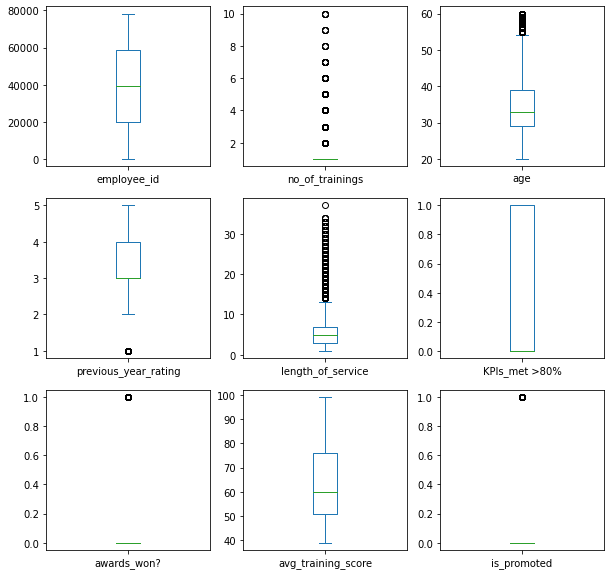

In [30]:
# Outlier detection using Box plot

train.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))
plt.show()

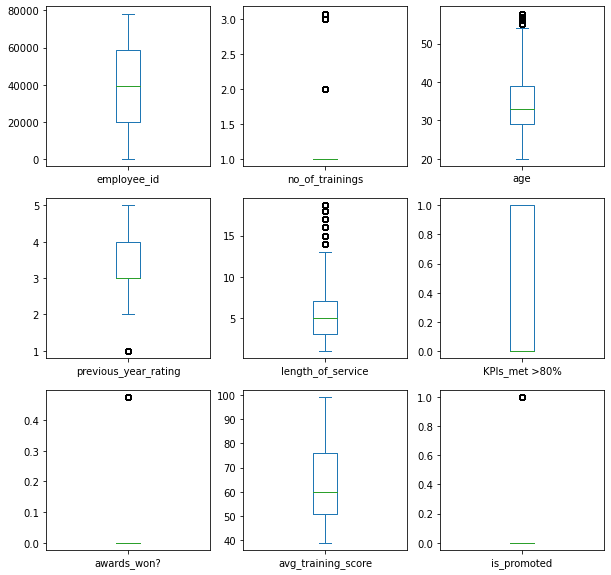

In [31]:
cols = ['no_of_trainings', 'age','previous_year_rating','length_of_service','awards_won?']

for column in cols:
    uplimit = train[column].mean() + 3*train[column].std()
    lowlimit = train[column].mean() - 3*train[column].std()
    train.loc[(train[column] > uplimit),column] = uplimit
    train.loc[(train[column] < lowlimit),column] = lowlimit

train.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))
plt.show()

In [32]:
numericalCols = train.select_dtypes(include=np.number).columns
numericalCols


Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [33]:
descriateCols=[]
continuesCols=[]

for column in numericalCols:
    if train[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)


In [34]:
continuesCols

['employee_id', 'age', 'avg_training_score']

In [35]:
# Checking the unique values

print(f"Department    : {train['department'].unique()}")
print(f"region        : {train['region'].unique()}")
print(f"education     : {train['education'].unique()}")
print(f"gender        : {train['gender'].unique()}")
print(f"recruitment_channel : {train['recruitment_channel'].unique()}")



Department    : ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region        : ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education     : ["Master's & above" "Bachelor's" 'Below Secondary']
gender        : ['f' 'm']
recruitment_channel : ['sourcing' 'other' 'referred']


In [38]:
le = LabelEncoder()
train['gender'] = le.fit_transform(train['gender'])
train['education'] = le.fit_transform(train['education'])
train['recruitment_channel'] = le.fit_transform(train['recruitment_channel'])
train['department'] = le.fit_transform(train['department'])
train['region'] = le.fit_transform(train['region'])

train.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1.0,35.0,5.0,8.0,1,0.0,49,0
1,65141,4,14,0,1,0,1.0,30.0,5.0,4.0,0,0.0,60,0
2,7513,7,10,0,1,2,1.0,34.0,3.0,7.0,0,0.0,50,0
3,2542,7,15,0,1,0,2.0,39.0,1.0,10.0,0,0.0,50,0
4,48945,8,18,0,1,0,1.0,45.0,3.0,2.0,0,0.0,73,0


In [39]:
#onehot = OneHotEncoder()
#train['department'] = onehot.fit_transform(train['department'])
#train['region'] = onehot.fit_transform(train['region'])